<a href="https://colab.research.google.com/github/rahulsait/ExcelR-codes/blob/main/LOGISTIC_REGRESSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **An insurance firm may be interested in finding the probability of a claimant appointing an attorney.**
## **Depending on the demographic characteristic of the claimants appointing an attorney, the firm aims to design different policy instruments for different target groups.**

# **Using Accuracy to check the fit of the Model :**

In [14]:
import pandas as pd
from sklearn.linear_model import LogisticRegression 

In [2]:
# Load the data set :
claimants = pd.read_csv("/content/claimants.csv")

In [3]:
claimants.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [4]:
# let's drop the case no. column as it's useless as shit :
claimants.drop(["CASENUM"], inplace = True, axis = 1)

In [5]:
# no. of rows and no. of columns :
claimants.shape

(1340, 6)

In [7]:
# Removing the NA values from the dataset if any :
claimants = claimants.dropna()
claimants.shape

(1096, 6)

In [8]:
# dividing the data into input and output variables ie. response variable and the predictors :
X = claimants.iloc[:,1:]
Y = claimants.iloc[:,0]

In [9]:
# Logistic regression and fit the model : Model Building
classifier = LogisticRegression()
classifier.fit(X,Y)

LogisticRegression()

In [10]:
# predicting the values for X dataset(predictors) :
y_pred = classifier.predict(X)

In [11]:
y_pred

array([0, 1, 1, ..., 1, 0, 1])

In [17]:
# creating a dataframe with Actual values and Predicted values :
y_pred_df = pd.DataFrame({"Actual values" : Y,
                          "Predicted values" : y_pred})

In [18]:
y_pred_df

,Actual values,Predicted values
0,0,0
1,1,1
2,1,1
3,0,0
4,1,1
...,...,...
1334,1,1
1336,0,0
1337,1,1
1338,0,0


In [19]:
# checking the accuracy of the model using Confusion matrix :
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print(confusion_matrix)

[[381 197]
 [123 395]]


In [20]:
# Computing the Accuracy : (a + d)/(a + b + c + d) :
(381 + 395)/(381 + 197 + 123 + 395)


0.708029197080292

In [21]:
# Classification Report :
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.66      0.70       578
           1       0.67      0.76      0.71       518

    accuracy                           0.71      1096
   macro avg       0.71      0.71      0.71      1096
weighted avg       0.71      0.71      0.71      1096



# **Using ROC Curve to check the fit of the Model :**

In [22]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [23]:
fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba (X)[:,1])

auc = roc_auc_score(Y,y_pred)


In [27]:
 classifier.predict_proba (X)

array([[9.99996954e-01, 3.04621690e-06],
       [4.92851125e-01, 5.07148875e-01],
       [4.24833157e-01, 5.75166843e-01],
       ...,
       [2.60971335e-01, 7.39028665e-01],
       [7.14059407e-01, 2.85940593e-01],
       [3.19568787e-01, 6.80431213e-01]])

In [24]:
auc #(Area under the curve)

0.7108589063606365

Text(0, 0.5, 'True Positive Rate')

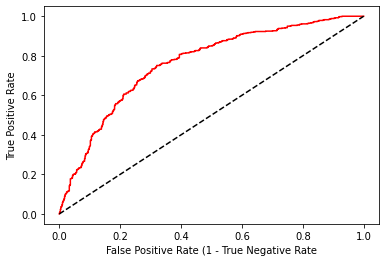

In [25]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color = "red", label = "logit model (area = %0.2f)" %auc)
plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate (1 - True Negative Rate")
plt.ylabel("True Positive Rate")

In [26]:
auc

0.7108589063606365